In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
two_blobs = pd.read_csv('../coursePY/cluster_two_blobs.csv')

In [3]:
two_blobs_outliers = pd.read_csv('../coursePY/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

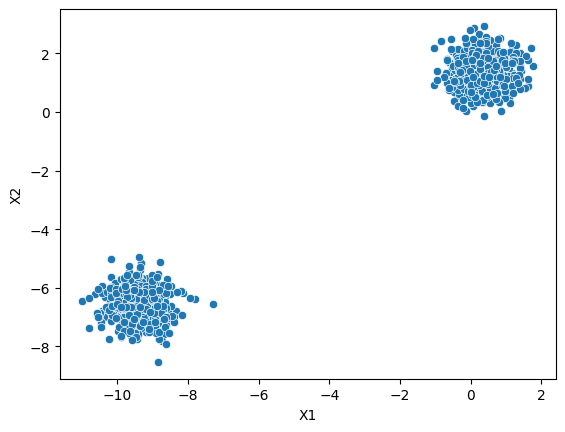

In [4]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

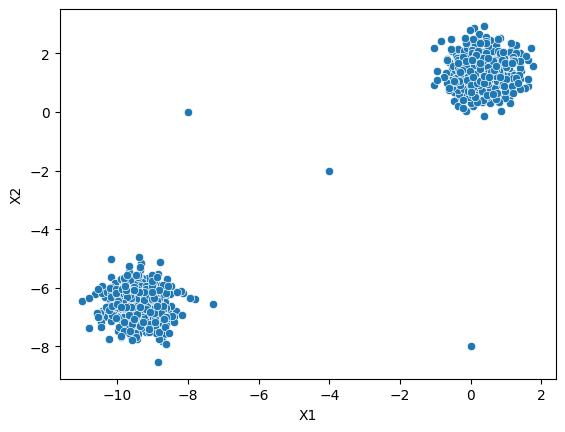

In [5]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [6]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
dbscan = DBSCAN()

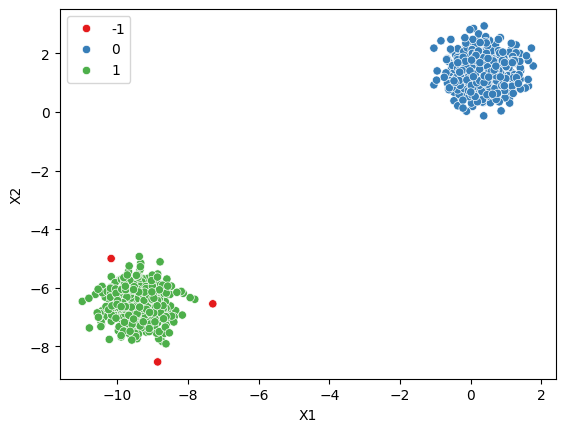

In [9]:
display_categories(dbscan,two_blobs)

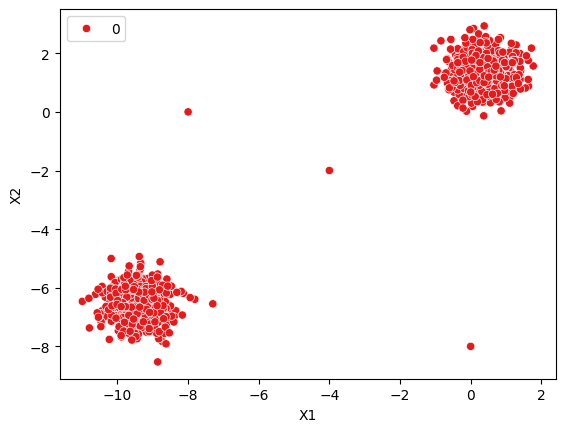

In [10]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

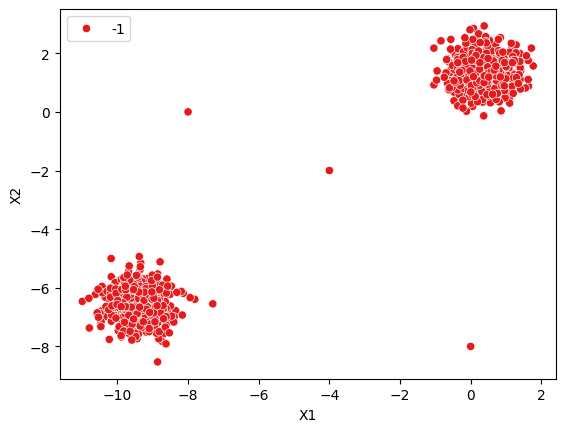

In [11]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

In [16]:
outliers_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,7,200):

    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outliers_percent.append(perc_outliers)

(0.0, 2.0)

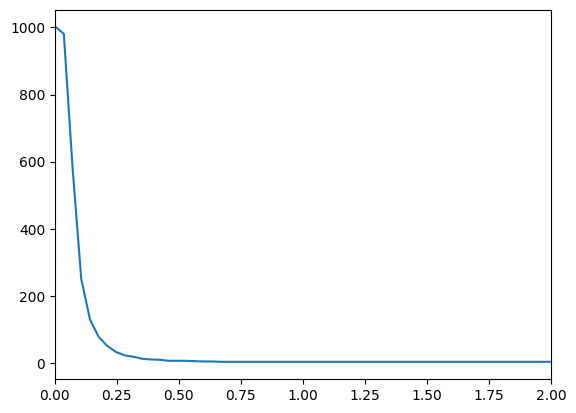

In [17]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers)
plt.xlim(0,2)

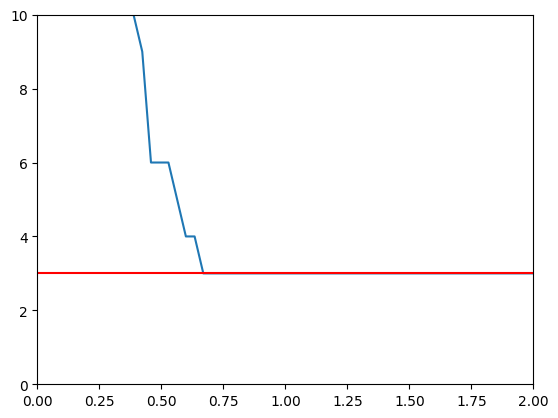

In [22]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')